In [1]:
import numpy as np


In [2]:
data = np.load('half_cut_Mg22_train.npy')


In [3]:

# Inspect the shape and structure of the data
data_shape = data.shape
data_example = data[0]  # Displaying the first event as an example

data_shape, data_example

((2015, 256, 3),
 array([[0.48182133, 0.53667136, 0.10343284],
        [0.48182133, 0.53667136, 0.10343284],
        [0.48182133, 0.53667136, 0.10343284],
        [0.47727667, 0.52879977, 0.13208955],
        [0.47727667, 0.52879977, 0.13208955],
        [0.47727667, 0.52879977, 0.13208955],
        [0.47273201, 0.52630134, 0.14164179],
        [0.47273201, 0.52092818, 0.16074627],
        [0.47273201, 0.52092818, 0.16074627],
        [0.47273201, 0.52092818, 0.16074627],
        [0.47727667, 0.51842975, 0.17029851],
        [0.47727667, 0.5130566 , 0.18223881],
        [0.47727667, 0.5130566 , 0.18223881],
        [0.48182133, 0.51055816, 0.19895522],
        [0.48182133, 0.50518501, 0.20850746],
        [0.48636599, 0.50268658, 0.21567164],
        [0.54090198, 0.58140244, 0.22283582],
        [0.5499913 , 0.58140244, 0.22283582],
        [0.5499913 , 0.58140244, 0.22283582],
        [0.5499913 , 0.58140244, 0.22283582],
        [0.53635732, 0.58927402, 0.22522388],
        [0.540901

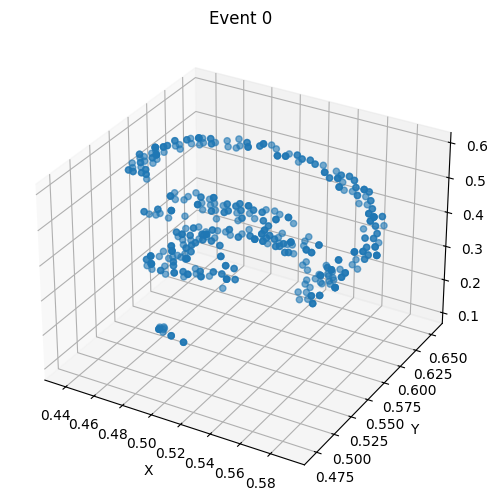

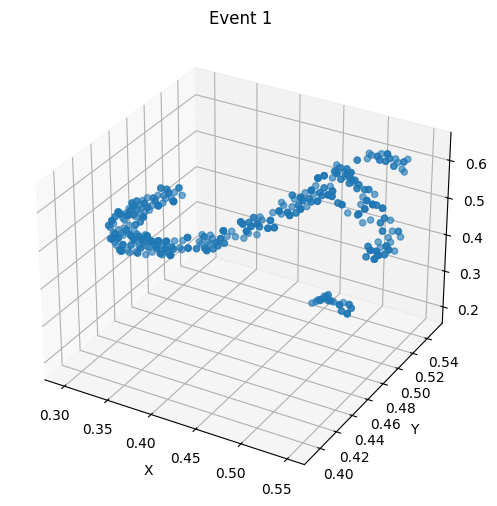

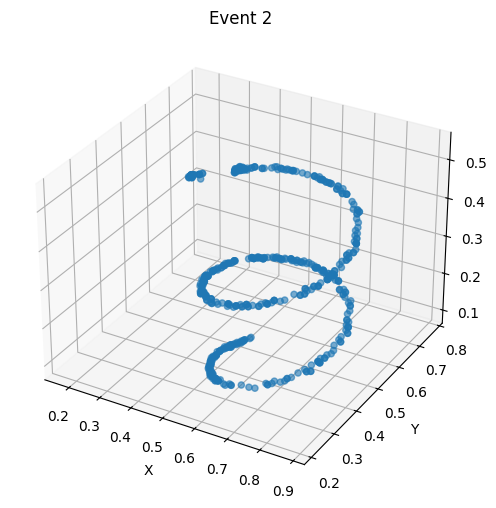

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot individual events
def plot_event(event_data, event_number):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(event_data[:, 0], event_data[:, 1], event_data[:, 2], alpha=0.6)
    ax.set_title(f'Event {event_number}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Plotting the first 3 events as an example
for i in range(3):
    plot_event(data[i], i)

In [5]:
# Load the new data from the file
new_data = np.load('../Mg22_size512_convertXYZQ_train.npy')

# Inspect the shape and structure of the new data
new_data_shape = new_data.shape
new_data_example = new_data[0]  # Displaying the first event as an example

new_data_shape, new_data_example

((2015, 512, 7),
 array([[5.68169940e-01, 5.13056595e-01, 5.11791045e-01, ...,
         1.00000000e+00, 6.07500000e+03, 3.00000000e+00],
        [5.72714601e-01, 5.20928178e-01, 5.14179104e-01, ...,
         1.00000000e+00, 6.07500000e+03, 0.00000000e+00],
        [5.63625279e-01, 5.10558165e-01, 5.14179104e-01, ...,
         1.00000000e+00, 6.07500000e+03, 0.00000000e+00],
        ...,
        [4.90910653e-01, 4.79071820e-01, 4.49701493e-01, ...,
         4.00000000e+00, 6.07500000e+03, 0.00000000e+00],
        [4.86365997e-01, 6.54745144e-01, 4.87910448e-01, ...,
         3.00000000e+00, 6.07500000e+03, 0.00000000e+00],
        [5.22723336e-01, 5.13056595e-01, 5.71492537e-01, ...,
         4.00000000e+00, 6.07500000e+03, 0.00000000e+00]]))

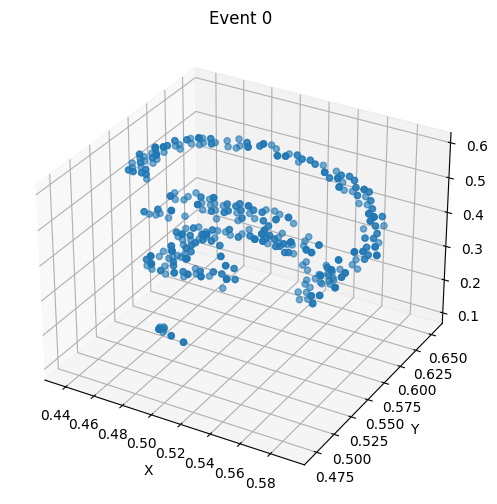

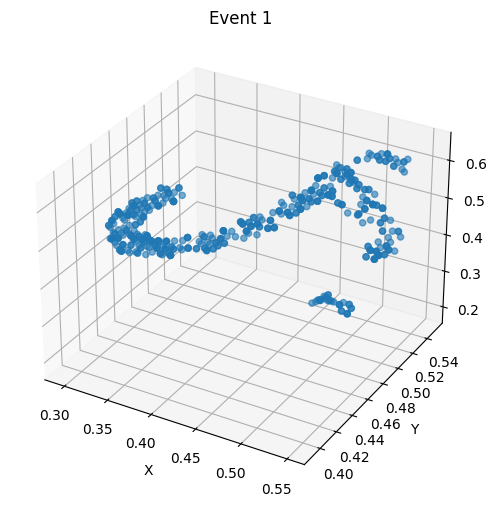

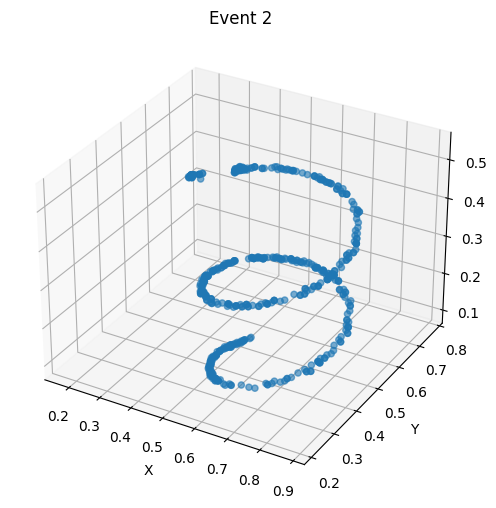

In [6]:
# Plotting the first 3 events from the new dataset as an example
for i in range(3):
    plot_event(new_data[i, :, :3], i)  # Only using the first 3 columns as x, y, z coordinates

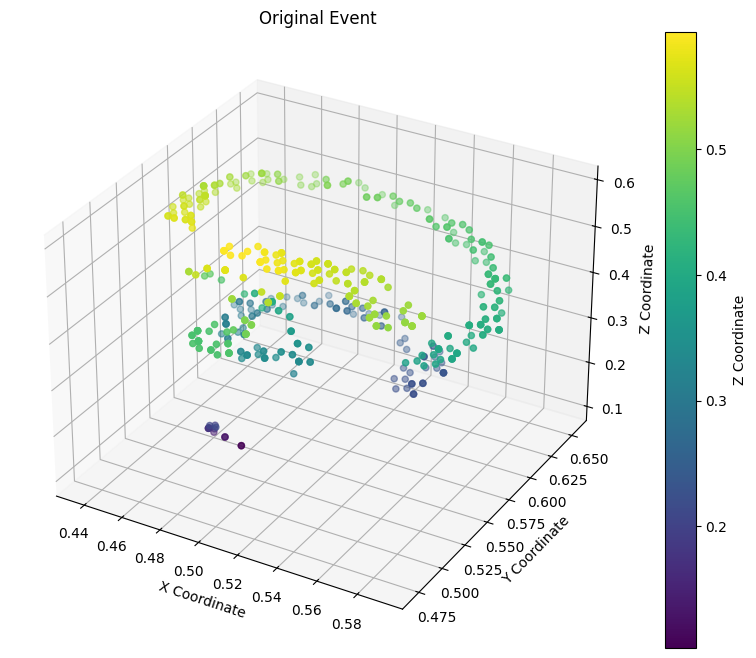

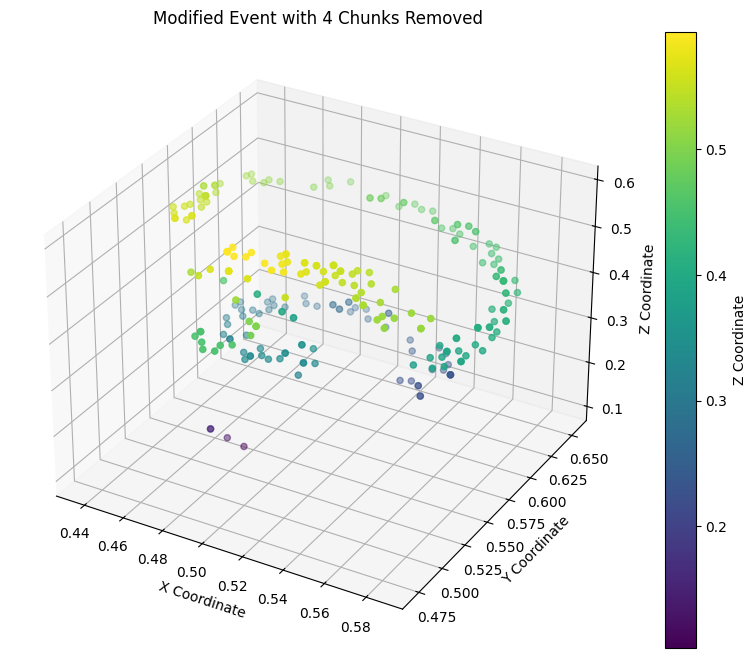

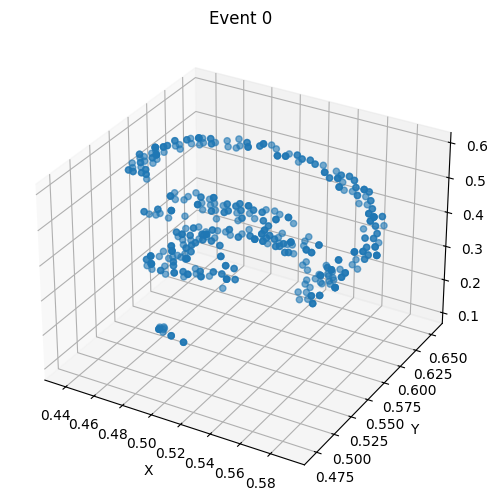

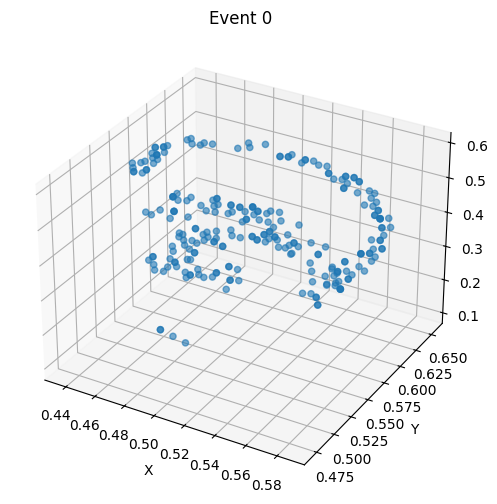

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

# Function to load the dataset
def load_data(file_path):
    return np.load(file_path)

# Function to remove points in segments along the Z axis
def remove_points_in_segments(event, num_segments, total_points_to_remove):
    points_per_segment = total_points_to_remove // num_segments
    z_min, z_max = np.min(event[:, 2]), np.max(event[:, 2])
    segment_size = (z_max - z_min) / num_segments
    modified_event = event.copy()

    for i in range(num_segments):
        z_lower = z_min + i * segment_size
        z_upper = z_lower + segment_size
        segment_mask = (modified_event[:, 2] >= z_lower) & (modified_event[:, 2] < z_upper)
        segment_points = modified_event[segment_mask]

        if len(segment_points) > points_per_segment:
            points_to_remove = np.random.choice(range(len(segment_points)), points_per_segment, replace=False)
            segment_points = np.delete(segment_points, points_to_remove, axis=0)

        modified_event = np.concatenate([modified_event[~segment_mask], segment_points])

    return modified_event

# Function to plot a 3D scatter plot of an event
def plot_3d_scatter(event, title):
    x, y, z = event[:, 0], event[:, 1], event[:, 2]
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=z, cmap='viridis')
    plt.colorbar(scatter, ax=ax, label='Z Coordinate')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    ax.set_title(title)
    plt.show()

# Load your dataset
file_path = '../Mg22_size512_convertXYZQ_train.npy'  # Replace with your file path
data = load_data(file_path)

# Use the first event for demonstration
first_event = data[0]

# Modify the event by removing chunks
modified_event = remove_points_in_segments(first_event, 1, 256)  # 4 chunks, 64 points each

# Plotting
plot_3d_scatter(first_event, 'Original Event')
plot_3d_scatter(modified_event, 'Modified Event with 4 Chunks Removed')


plot_event(first_event, 0)  # Only using the first 3 columns as x, y, z coordinates
plot_event(modified_event, 0)  # Only using the first 3 columns as x, y, z coordinates

In [8]:
first_event.shape

(512, 7)

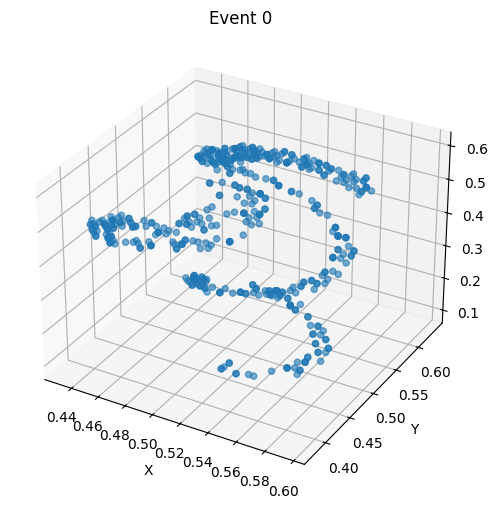

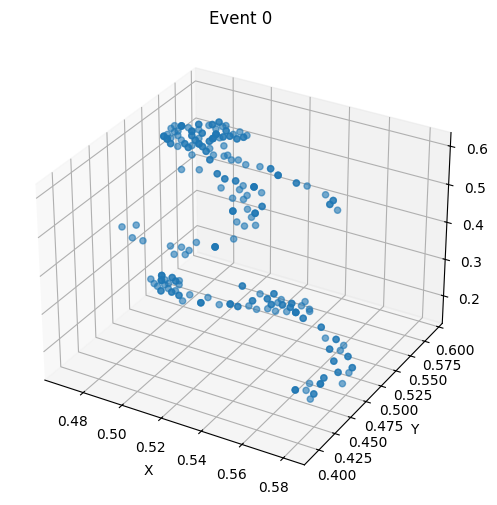

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

# Function to load the dataset
def load_data(file_path):
    return np.load(file_path)

# Function to remove points in random Z range segments
def remove_random_z_chunks(event, num_chunks, total_points_to_remove):
    # Ensure the event has enough points to remove
    if len(event) <= total_points_to_remove:
        raise ValueError("Event does not have enough points to remove.")

    z_values = event[:, 2]
    removed_points = 0
    modified_event = event.copy()

    while removed_points < total_points_to_remove:
        # Randomly select a Z value as the center for a chunk
        z_center = random.choice(z_values)
        z_range = 0.05  # Adjust the range size as needed

        # Define the chunk boundaries
        z_lower = z_center - z_range
        z_upper = z_center + z_range

        # Remove points in this chunk
        chunk_mask = (modified_event[:, 2] >= z_lower) & (modified_event[:, 2] <= z_upper)
        points_in_chunk = modified_event[chunk_mask]

        # Calculate the number of points to remove from this chunk
        points_to_remove = min(len(points_in_chunk), total_points_to_remove - removed_points)
        points_to_remove_indices = np.random.choice(range(len(points_in_chunk)), points_to_remove, replace=False)

        # Remove the selected points
        modified_event = np.delete(modified_event, np.nonzero(chunk_mask)[0][points_to_remove_indices], axis=0)

        # Update the count of removed points
        removed_points += points_to_remove

    return modified_event

# Function to plot a 3D scatter plot of an event
def plot_3d_scatter(event, title):
    x, y, z = event[:, 0], event[:, 1], event[:, 2]
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=z, cmap='viridis')
    plt.colorbar(scatter, ax=ax, label='Z Coordinate')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    ax.set_title(title)
    plt.show()

# Load your dataset
file_path = '../Mg22_size512_convertXYZQ_train.npy'  # Replace with your file path
data = load_data(file_path)

# Use the first event for demonstration
first_event = data[6]

# Modify the event by removing random chunks along the Z axis
modified_event = remove_random_z_chunks(first_event, 10, 256)  # 4 chunks, 256 points in total

plot_event(first_event, 0)  # Only using the first 3 columns as x, y, z coordinates
plot_event(modified_event, 0)  # Only using the first 3 columns as x, y, z coordinates


In [15]:
first_event.shape

(512, 7)